In [49]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV,  GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

In [50]:
X = pd.read_csv('ppiemb.csv') # feature array
X.head()


,Protein_ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_119,Feature_120,Feature_121,Feature_122,Feature_123,Feature_124,Feature_125,Feature_126,Feature_127,Feature_128
0,33604,-0.510713,-0.034698,0.226693,-0.104328,-0.538392,-0.507054,0.492950,-1.00316,0.028777,...,0.089326,0.051028,0.111069,0.001206,0.026827,-0.177385,0.000920,0.091404,0.057852,0.037080
1,32517,-0.491558,-0.046047,0.257778,-0.160126,-0.554985,-0.543983,0.572091,-1.18108,-0.016534,...,0.140605,0.056848,-0.025456,0.029715,0.044395,-0.051489,0.130238,0.117172,0.145234,-0.037787
2,33032,-0.185390,-0.045132,0.207800,-0.087014,-0.451806,-0.529272,0.541076,-1.15432,0.015249,...,-0.000517,0.003153,-0.055355,-0.023645,-0.044576,0.167176,-0.060008,-0.064866,-0.100815,-0.031260
3,32122,-0.419456,-0.043147,0.196954,-0.008683,-0.365592,-0.459568,0.522353,-1.08144,0.007236,...,-0.001924,0.036864,-0.023502,-0.012770,0.027593,-0.115401,0.006661,0.034642,-0.053900,-0.001947
4,31903,-0.270278,0.042724,0.222879,-0.087699,-0.453998,-0.456130,0.546997,-1.45105,0.066381,...,0.065648,-0.013739,-0.002602,-0.025708,0.006592,-0.025986,0.072824,0.108263,0.026072,0.053583


In [51]:
y = pd.read_csv('ppiemb_essentiality.csv') # target array
y.head()

,Essentiality
0,1
1,0
2,1
3,0
4,0


In [52]:
X.dtypes

Protein_ID       int64
Feature_1      float64
Feature_2      float64
Feature_3      float64
Feature_4      float64
                ...   
Feature_124    float64
Feature_125    float64
Feature_126    float64
Feature_127    float64
Feature_128    float64
Length: 129, dtype: object

In [53]:
y.dtypes

Essentiality    int64
dtype: object

In [54]:
sum(y['Essentiality'])/len(y['Essentiality']) # to see the percentage of the essential genes in y.

0.152945979044768

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
# test_size = 0.25, train_size = 0.75

In [56]:
sum(y_train['Essentiality'])/len(y_train['Essentiality']) # check to see if the percentage of essential genes in training set is the same with y. 

0.15296679368535657

In [57]:
sum(y_test['Essentiality'])/len(y_test['Essentiality']) # check to see if the percentage of essential genes in testing set is the same with y. 

0.1528835690968444

[11:48:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:  0.9249183895538629
0.8069446444366732


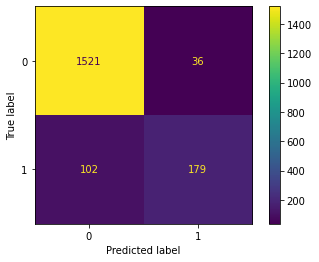

In [66]:
# plot_confusion_matrix(clf_xgb,
#                      X_test,
#                      y_test)
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, seed=42)

xgb_clf.fit(X_train, y_train)

predictions = xgb_clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, predictions))
print(balanced_accuracy_score(y_test, predictions))

c_matrix = confusion_matrix(y_test, predictions, labels=xgb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix,
                              display_labels=xgb_clf.classes_)
disp.plot()
plt.show()

## Hyperparameter Optimization (WIP)

## GridSearchCV()

In [65]:
#GridSearchCV()

## Round 1
    # param_grid = {
    #     'max_depth': [3,4,5], # possible tree levels
    #     'learning_rate': [0.1, 0.01, 0.05],
    #     'gamma': [0, 0.25, 1.0],
    #     'reg_lambda': [0, 1.0, 10.0],
    #     'scale_pos_weight': [1, 3, 5]
    # }

## Results of Round 1
    # XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
    #               colsample_bynode=1, colsample_bytree=0.5,
    #               enable_categorical=False, gamma=1.0, gpu_id=-1,
    #               importance_type=None, interaction_constraints='',
    #               learning_rate=0.1, max_delta_step=0, max_depth=5,
    #               min_child_weight=1, missing=np.nan, monotone_constraints='()',
    #               n_estimators=100, n_jobs=12, num_parallel_tree=1,
    #               predictor='auto', random_state=42, reg_alpha=0, reg_lambda=10.0,
    #               scale_pos_weight=1, seed=42, subsample=0.9, tree_method='exact',
    #               validate_parameters=1, verbosity=None)
    # {'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 10.0, 'scale_pos_weight': 1}

## Round 2
    # param_grid = {
    #     'max_depth': [5, 6, 7],
    #     'learning_rate': [0.2, 0.15, 0.1],
    #     'gamma': [1.0, 2.0, 3.0, 4.0],
    #     'reg_lambda': [10.0, 20.0, 100.0],
    #     'scale_pos_weight': [1]
    #}
    
## Results of Round 2
   # XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
   #            colsample_bynode=1, colsample_bytree=0.5,
   #            enable_categorical=False, gamma=2.0, gpu_id=-1,
   #            importance_type=None, interaction_constraints='',
   #            learning_rate=0.15, max_delta_step=0, max_depth=7,
   #            min_child_weight=1, missing=np.nan, monotone_constraints='()',
   #            n_estimators=100, n_jobs=12, num_parallel_tree=1,
   #            predictor='auto', random_state=42, reg_alpha=0, reg_lambda=20.0,
   #            scale_pos_weight=1, seed=42, subsample=0.9, tree_method='exact',
   #            validate_parameters=1, verbosity=None)
   #  {'gamma': 2.0, 'learning_rate': 0.15, 'max_depth': 7, 'reg_lambda': 20.0, 'scale_pos_weight': 1}

## Round 3
# param_grid= {     
#      'learning_rate'    : [0.15] ,
#      'max_depth'        : [7, 10, 13],
#      'min_child_weight' : [1, 3, 5],
#      'gamma'            : [1.0],
#      'reg_lambda'       : [20.0, 40.0, 60.0],
#      'scale_pos_weight' : [1]
# }

## Results of Round 3
    # XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
    #               colsample_bynode=1, colsample_bytree=0.5,
    #               enable_categorical=False, gamma=1.0, gpu_id=-1,
    #               importance_type=None, interaction_constraints='',
    #               learning_rate=0.15, max_delta_step=0, max_depth=7,
    #               min_child_weight=5, missing=np.nan, monotone_constraints='()',
    #               n_estimators=100, n_jobs=12, num_parallel_tree=1,
    #               predictor='auto', random_state=42, reg_alpha=0, reg_lambda=40.0,
    #               scale_pos_weight=1, seed=42, subsample=0.9, tree_method='exact',
    #               validate_parameters=1, verbosity=None)
    # {'gamma': 1.0, 'learning_rate': 0.15, 'max_depth': 7, 'min_child_weight': 5, 'reg_lambda': 40.0, 'scale_pos_weight': 1}
    
##Round 4

# param_grid = {
#          'max_depth': [7, 9, 11, 13, 15],
#          'learning_rate': [0.15],
#          'gamma': [2.0],
#          'reg_lambda': [20.0, 40.0, 60.0],
#          'scale_pos_weight': [1]
#     }

## Results of Round 4
    # XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
    #               colsample_bynode=1, colsample_bytree=0.5,
    #               enable_categorical=False, gamma=2.0, gpu_id=-1,
    #               importance_type=None, interaction_constraints='',
    #               learning_rate=0.15, max_delta_step=0, max_depth=7,
    #               min_child_weight=1, missing=np.nan, monotone_constraints='()',
    #               n_estimators=100, n_jobs=12, num_parallel_tree=1,
    #               predictor='auto', random_state=42, reg_alpha=0, reg_lambda=20.0,
    #               scale_pos_weight=1, seed=42, subsample=0.9, tree_method='exact',
    #               validate_parameters=1, verbosity=None)
    # {'gamma': 2.0, 'learning_rate': 0.15, 'max_depth': 7, 'reg_lambda': 20.0, 'scale_pos_weight': 1}
    
## Round 5

param_grid = {
         'max_depth': [5, 6, 7],
         'learning_rate': [0.2, 0.15, 0.1],
         'min_child_weight' : [1, 3, 5],
         'gamma': [1.0, 2.0, 3.0, 4.0],
         'reg_lambda': [10.0, 20.0, 100.0],
         'scale_pos_weight': [1]
    }

## Results of Round 5
    # XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
    #              colsample_bynode=1, colsample_bytree=0.5,
    #              enable_categorical=False, gamma=3.0, gpu_id=-1,
    #              importance_type=None, interaction_constraints='',
    #              learning_rate=0.2, max_delta_step=0, max_depth=6,
    #              min_child_weight=3, missing=np.nan, monotone_constraints='()',
    #              n_estimators=100, n_jobs=12, num_parallel_tree=1,
    #              predictor='auto', random_state=42, reg_alpha=0, reg_lambda=10.0,
    #              scale_pos_weight=1, seed=42, subsample=0.9, tree_method='exact',
    #               validate_parameters=1, verbosity=None)
    #{'gamma': 3.0, 'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 3, 'reg_lambda': 10.0, 'scale_pos_weight': 1}


## when working with imbalanced data:
## balance the positive and negative weights with scale_pos_weight
## use AUC for evaluation

## to prevent overfitting and to speed up the process, 
## set subsample = 0.9,
## set colsample_bytree = 0.5 so that a random subset (50%) of columns are used
## cv = 3, three-fold cross-validation

optimal_parameters = GridSearchCV(estimator = xgb.XGBClassifier(objective='binary:logistic',
                                                              seed=42,
                                                              subsample=0.9,
                                                              colsample_bytree=0.5
                                                               ),
                                 param_grid = param_grid,
                                 scoring = 'roc_auc',
                                 verbose = 2,
                                 n_jobs = 10,
                                 cv = 4)

optimal_parameters.fit(X_train,
                       y_train,
                       early_stopping_rounds=10,
                       eval_metric='auc',
                       eval_set=[(X_test, y_test)],
                       verbose=True)


# classifier=xgb.XGBClassifier()
# random_search = RandomizedSearchCV(classifier, param_distributions=param_grid, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)


# random_search.fit(X_train,y_train)

print(optimal_parameters.best_estimator_)
print(optimal_parameters.best_params_)

Fitting 4 folds for each of 324 candidates, totalling 1296 fits
[0]	validation_0-auc:0.81394
[1]	validation_0-auc:0.85219
[2]	validation_0-auc:0.86025
[3]	validation_0-auc:0.86262
[4]	validation_0-auc:0.87470
[5]	validation_0-auc:0.87381
[6]	validation_0-auc:0.87728
[7]	validation_0-auc:0.88015


C:\Users\Burcu\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Burcu\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Burcu\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

[8]	validation_0-auc:0.88185
[9]	validation_0-auc:0.88310
[10]	validation_0-auc:0.88482
[11]	validation_0-auc:0.88590
[12]	validation_0-auc:0.88814
[13]	validation_0-auc:0.88949
[14]	validation_0-auc:0.89162
[15]	validation_0-auc:0.89385
[16]	validation_0-auc:0.89329
[17]	validation_0-auc:0.89407
[18]	validation_0-auc:0.89498
[19]	validation_0-auc:0.89791
[20]	validation_0-auc:0.89902
[21]	validation_0-auc:0.89867
[22]	validation_0-auc:0.89963
[23]	validation_0-auc:0.90068
[24]	validation_0-auc:0.90215
[25]	validation_0-auc:0.90234
[26]	validation_0-auc:0.90305
[27]	validation_0-auc:0.90364
[28]	validation_0-auc:0.90448
[29]	validation_0-auc:0.90611
[30]	validation_0-auc:0.90604
[31]	validation_0-auc:0.90654
[32]	validation_0-auc:0.90647
[33]	validation_0-auc:0.90778
[34]	validation_0-auc:0.90875
[35]	validation_0-auc:0.90889
[36]	validation_0-auc:0.90873
[37]	validation_0-auc:0.90900
[38]	validation_0-auc:0.91013
[39]	validation_0-auc:0.91053
[40]	validation_0-auc:0.91070
[41]	validat

In [63]:
# With GridSearchCV
# Round 3 :{'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 10.0, 'scale_pos_weight': 1} -> 0.7999746295572515
          # -> 0.7970581714539092
# Round 4: {'gamma': 2.0, 'learning_rate': 0.15, 'max_depth': 7, 'reg_lambda': 20.0, 'scale_pos_weight': 1} -> 0.790582994489357
           # -> 0.790582994489357
    
# Round 5: {'gamma': 3.0, 'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 3, 'reg_lambda': 10.0, 'scale_pos_weight': 1} -> 0.8012854357659245
           # Accuracy:  0.926006528835691
           # Balanced Accuracy:  0.8032122180395276
    
clf_grid = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                  colsample_bynode=1, colsample_bytree=0.5,
                  enable_categorical=False, gamma=3.0, gpu_id=-1,
                  importance_type=None, interaction_constraints='',
                  learning_rate=0.2, max_delta_step=0, max_depth=6,
                  min_child_weight=3, missing=np.nan, monotone_constraints='()',
                  n_estimators=100, n_jobs=12, num_parallel_tree=1,
                  predictor='auto', random_state=42, reg_alpha=0, reg_lambda=10.0,
                  scale_pos_weight=1, seed=42, subsample=0.9, tree_method='exact',
                  validate_parameters=1, verbosity=None)

# y_train.values.ravel()
clf_grid.fit(X_train, 
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.56613
[1]	validation_0-aucpr:0.66462
[2]	validation_0-aucpr:0.66640
[3]	validation_0-aucpr:0.67583
[4]	validation_0-aucpr:0.68531


C:\Users\Burcu\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Burcu\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Burcu\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

[5]	validation_0-aucpr:0.68500
[6]	validation_0-aucpr:0.68628
[7]	validation_0-aucpr:0.69820
[8]	validation_0-aucpr:0.69895
[9]	validation_0-aucpr:0.70540
[10]	validation_0-aucpr:0.71379
[11]	validation_0-aucpr:0.72150
[12]	validation_0-aucpr:0.72582
[13]	validation_0-aucpr:0.72583
[14]	validation_0-aucpr:0.73113
[15]	validation_0-aucpr:0.72881
[16]	validation_0-aucpr:0.73578
[17]	validation_0-aucpr:0.73924
[18]	validation_0-aucpr:0.74144
[19]	validation_0-aucpr:0.74585
[20]	validation_0-aucpr:0.74564
[21]	validation_0-aucpr:0.74849
[22]	validation_0-aucpr:0.74920
[23]	validation_0-aucpr:0.75192
[24]	validation_0-aucpr:0.75269
[25]	validation_0-aucpr:0.75574
[26]	validation_0-aucpr:0.75876
[27]	validation_0-aucpr:0.75745
[28]	validation_0-aucpr:0.75771
[29]	validation_0-aucpr:0.75752
[30]	validation_0-aucpr:0.75794
[31]	validation_0-aucpr:0.75676
[32]	validation_0-aucpr:0.75859
[33]	validation_0-aucpr:0.76054
[34]	validation_0-aucpr:0.75935
[35]	validation_0-aucpr:0.76050
[36]	validati

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=3.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=42, reg_alpha=0, reg_lambda=10.0,
              scale_pos_weight=1, seed=42, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

Accuracy:  0.926006528835691
Balanced Accuracy:  0.8032122180395276


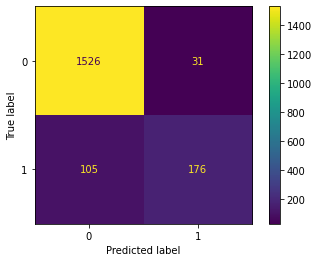

In [64]:
# with GridSearchCV, 0.7999746295572515 for
# {'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 10.0, 'scale_pos_weight': 1}
predictions = clf_grid.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Balanced Accuracy: ",balanced_accuracy_score(y_test, predictions))

c_matrix = confusion_matrix(y_test, predictions, labels=clf_grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix,
                              display_labels=clf_grid.classes_)
disp.plot()
plt.show()

## RandomizedSearchCV()

In [60]:
#RandomizedSearchCV()

#Round 1
# param_grid = {
#     'max_depth': [3,4,5], # possible tree levels
#     'learning_rate': [0.1, 0.01, 0.05],
#     'gamma': [0, 0.25, 1.0],
#     'reg_lambda': [0, 1.0, 10.0],
#     'scale_pos_weight': [1, 3, 5]
# }

# XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
#               gamma=0.25, gpu_id=-1, importance_type=None,
#               interaction_constraints='', learning_rate=0.1, max_delta_step=0,
#               max_depth=4, min_child_weight=1, missing=np.nan,
#               monotone_constraints='()', n_estimators=100, n_jobs=12,
#               num_parallel_tree=1, predictor='auto', random_state=0,
#               reg_alpha=0, reg_lambda=1.0, scale_pos_weight=5, subsample=1,
#               tree_method='exact', validate_parameters=1, verbosity=None)
# {'scale_pos_weight': 5, 'reg_lambda': 1.0, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.25}

## Round 2
# param_grid = {
#     'max_depth': [4],
#     'learning_rate': [0.2, 0.05, 0.1],
#     'gamma': [0.25],
#     'reg_lambda': [1.0],
#     'scale_pos_weight': [5, 6, 7]
#} 

## Round 3
#param_grid = {
#         'max_depth': [5, 6, 7],
#         'learning_rate': [0.1, 0.01, 0.05],
#         'min_child_weight' : [1, 3, 5],
#         'gamma': [1.0, 2.0, 3.0, 4.0],
#         'reg_lambda': [10.0, 20.0, 100.0],
#         'scale_pos_weight': [1, 3, 5]
#    }

## Results of Round 3
#XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
#              gamma=2.0, gpu_id=-1, importance_type=None,
#              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
#              max_depth=5, min_child_weight=1, missing=np.nan,
#              monotone_constraints='()', n_estimators=100, n_jobs=12,
#              num_parallel_tree=1, predictor='auto', random_state=0,
#              reg_alpha=0, reg_lambda=20.0, scale_pos_weight=3, subsample=1,
#              tree_method='exact', validate_parameters=1, verbosity=None)

#{'scale_pos_weight': 3, 'reg_lambda': 20.0, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 2.0}

## Round 4

param_grid = {
         'max_depth': [3, 4, 5],
         'learning_rate': [0.2, 0.15, 0.1],
         'min_child_weight' : [1, 3, 5],
         'gamma': [1.0, 2.0, 3.0, 4.0],
         'reg_lambda': [0, 1.0, 5.0, 10.0, 20.0, 100.0],
         'scale_pos_weight': [1, 3, 5]
    }

## Round 4 Results
# XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
#              gamma=3.0, gpu_id=-1, importance_type=None,
#              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
#              max_depth=4, min_child_weight=1, missing=np.nan,
#              monotone_constraints='()', n_estimators=100, n_jobs=12,
#              num_parallel_tree=1, predictor='auto', random_state=0,
#              reg_alpha=0, reg_lambda=100.0, scale_pos_weight=3, subsample=1,
#              tree_method='exact', validate_parameters=1, verbosity=None)
#{'scale_pos_weight': 3, 'reg_lambda': 100.0, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 3.0}

## Round 5
#param_grid = {
#         'max_depth': [3, 4, 5],
#         'learning_rate': [0.2, 0.15, 0.1],
#         'min_child_weight' : [1, 3, 5],
#         'gamma': [1.0, 2.0, 3.0, 4.0, 5.0, 10.0, 20.0],
#         'reg_lambda': [10.0, 20.0, 100.0],
#         'scale_pos_weight': [1, 3, 5]
#    }

classifier=xgb.XGBClassifier()

#random_search = RandomizedSearchCV(classifier, pram_distributions=param_grid,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search = RandomizedSearchCV(classifier, param_distributions=param_grid, n_iter=5, scoring='roc_auc', n_jobs=-1, cv = 5, verbose = 3)

random_search.fit(X_train,y_train)

print(random_search.best_estimator_)
print(random_search.best_params_)

# Fitting 5 folds for each of 5 candidates, totalling 25 fits
# XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
#               gamma=0.25, gpu_id=-1, importance_type=None,
#               interaction_constraints='', learning_rate=0.05, max_delta_step=0,
#               max_depth=4, min_child_weight=1, missing=np.nan,
#               monotone_constraints='()', n_estimators=100, n_jobs=12,
#               num_parallel_tree=1, predictor='auto', random_state=0,
#               reg_alpha=0, reg_lambda=1.0, scale_pos_weight=3, subsample=1,
#               tree_method='exact', validate_parameters=1, verbosity=None)
# {'scale_pos_weight': 3, 'reg_lambda': 1.0, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0.25}

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Burcu\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Burcu\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Burcu\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

[10:35:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=3.0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.15, max_delta_step=0,
              max_depth=5, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'scale_pos_weight': 1, 'reg_lambda': 1.0, 'min_child_

In [61]:
# With RandomizedSearchCV
# {'scale_pos_weight': 3, 'reg_lambda': 0, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.25}

# Round 4 -> Accuracy:  0.9015233949945594
         #-> Balanced Accuracy:  0.8383411387443231
    
clf_rnd = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=3.0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=np.nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=100.0, scale_pos_weight=3, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

clf_rnd.fit(X_train, 
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.53532
[1]	validation_0-aucpr:0.60777
[2]	validation_0-aucpr:0.62588
[3]	validation_0-aucpr:0.63452
[4]	validation_0-aucpr:0.64631
[5]	validation_0-aucpr:0.65746
[6]	validation_0-aucpr:0.66780
[7]	validation_0-aucpr:0.68467
[8]	validation_0-aucpr:0.69385
[9]	validation_0-aucpr:0.69846
[10]	validation_0-aucpr:0.69956
[11]	validation_0-aucpr:0.70153
[12]	validation_0-aucpr:0.70613
[13]	validation_0-aucpr:0.71204
[14]	validation_0-aucpr:0.71901
[15]	validation_0-aucpr:0.71819
[16]	validation_0-aucpr:0.72289
[17]	validation_0-aucpr:0.72766
[18]	validation_0-aucpr:0.72752
[19]	validation_0-aucpr:0.72979
[20]	validation_0-aucpr:0.73341
[21]	validation_0-aucpr:0.73510
[22]	validation_0-aucpr:0.73793
[23]	validation_0-aucpr:0.73822
[24]	validation_0-aucpr:0.73961
[25]	validation_0-aucpr:0.74074
[26]	validation_0-aucpr:0.74304
[27]	validation_0-aucpr:0.74505
[28]	validation_0-aucpr:0.74629
[29]	validation_0-aucpr:0.74995
[30]	validation_0-aucpr:0.75431
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=3.0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=100.0, scale_pos_weight=3, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy:  0.9015233949945594
Balanced Accuracy:  0.8383411387443231


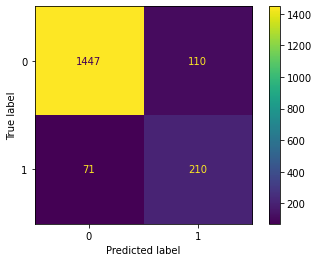

In [62]:
# With RandomizedSearchCV, 0.8366566327708409 for
# {'scale_pos_weight': 3, 'reg_lambda': 0, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.25}

predictions = clf_rnd.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Balanced Accuracy: ", balanced_accuracy_score(y_test, predictions))


c_matrix = confusion_matrix(y_test, predictions, labels=clf_rnd.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix,
                              display_labels=clf_rnd.classes_)
disp.plot()
plt.show()